# APIを使って作画を試みる。

In [1]:
import requests
import json

url="http://localhost:8088/tile/kanagawa/2024-09-08T06:00/12"
res = requests.get(url)
payload = json.loads(res.text)
data = payload["data"]
spec = payload["spec"]
data, spec



({'XY': [[3628, 1613],
   [3629, 1613],
   [3630, 1613],
   [3631, 1613],
   [3632, 1613],
   [3633, 1613],
   [3634, 1613],
   [3635, 1613],
   [3636, 1613],
   [3637, 1613],
   [3638, 1613],
   [3628, 1614],
   [3629, 1614],
   [3630, 1614],
   [3631, 1614],
   [3632, 1614],
   [3633, 1614],
   [3634, 1614],
   [3635, 1614],
   [3636, 1614],
   [3637, 1614],
   [3638, 1614],
   [3628, 1615],
   [3629, 1615],
   [3630, 1615],
   [3631, 1615],
   [3632, 1615],
   [3633, 1615],
   [3634, 1615],
   [3635, 1615],
   [3636, 1615],
   [3637, 1615],
   [3638, 1615],
   [3628, 1616],
   [3629, 1616],
   [3630, 1616],
   [3631, 1616],
   [3632, 1616],
   [3633, 1616],
   [3634, 1616],
   [3635, 1616],
   [3636, 1616],
   [3637, 1616],
   [3638, 1616],
   [3628, 1617],
   [3629, 1617],
   [3630, 1617],
   [3631, 1617],
   [3632, 1617],
   [3633, 1617],
   [3634, 1617],
   [3635, 1617],
   [3636, 1617],
   [3637, 1617],
   [3638, 1617],
   [3628, 1618],
   [3629, 1618],
   [3630, 1618],
   [3631

In [3]:
import numpy as np
from logging import getLogger, basicConfig, INFO, DEBUG
from folium import Map, LayerControl  # , Choropleth, FeatureGroup
from map import map_layer

basicConfig(level=INFO)

# レイヤごとに作画する
layers = []
for item in spec["items"]:
    values = np.array(data[item])

    # 新しいFoliumレイヤを定義する
    layers.append(map_layer("kanagawa", values.reshape(len(spec["Y"]), len(spec["X"])), item, spec[item]["range"]))

# 地図の中心位置
center = np.mean(spec["lat"]), np.mean(spec["lon"])

# 地図を作る
m = Map(center, zoom_start=10)

# レイヤをオーバーレイする
for layer in layers:
    layer.add_to(m)

# 切り替えボタン(もっと見易くしたい)
LayerControl().add_to(m)

# 表示
m

2024-09-10 19:43:38.228829: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 19:43:38.245926: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 19:43:38.251182: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 19:43:38.264933: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 19:43:39.119036: W tensorflow/compiler/tf2

# 測定局ごとの生の値

In [4]:
import requests
import json

url="http://localhost:8088/raw/kanagawa/2024-09-08T06:00"
res = requests.get(url)
payload = json.loads(res.text)
data = payload["data"]
spec = payload["spec"]
data, spec


({'SO2': {'14204010': 0.0,
   '14208020': nan,
   '14210010': 0.0,
   '14212020': 1.0,
   '14213010': 2.0,
   '14215010': nan,
   '14216020': nan,
   '14218010': nan,
   '14401010': nan,
   '14207010': 1.0,
   '14211010': 2.0,
   '14214020': nan,
   '14217020': 2.0,
   '14206010': 2.0,
   '14212520': nan,
   '14213510': nan,
   '14207510': nan,
   '14211510': nan,
   '14214510': nan,
   '14382010': 3.0,
   '14204530': nan,
   '14321010': nan,
   '14212530': nan,
   '14206520': nan,
   '14101010': 1.0,
   '14101020': nan,
   '14102010': 1.0,
   '14104030': 2.0,
   '14103010': 2.0,
   '14105020': 2.0,
   '14106010': 2.0,
   '14107010': 2.0,
   '14108020': 1.0,
   '14109040': 2.0,
   '14110050': 2.0,
   '14111020': 1.0,
   '14112020': 1.0,
   '14113020': 1.0,
   '14114020': 2.0,
   '14115010': 1.0,
   '14116010': 2.0,
   '14117010': 1.0,
   '14118010': 1.0,
   '14101520': nan,
   '14103510': nan,
   '14107520': nan,
   '14110510': nan,
   '14111520': nan,
   '14112510': nan,
   '14113510'

# 予測と実測の比較
例にならい、横軸に実測、縦軸に実測-予測。すべての格子点の、8時間後の予測値に関して。

In [51]:
import requests
import json

url="http://localhost:8088/ox/kanagawa/2024-09-09T06:00+09:00/12"
res = requests.get(url)
payload = json.loads(res.text)
data = payload["data"]
spec = payload["spec"]
data, spec



({'XY': [[3628, 1613],
   [3629, 1613],
   [3630, 1613],
   [3631, 1613],
   [3632, 1613],
   [3633, 1613],
   [3634, 1613],
   [3635, 1613],
   [3636, 1613],
   [3637, 1613],
   [3638, 1613],
   [3628, 1614],
   [3629, 1614],
   [3630, 1614],
   [3631, 1614],
   [3632, 1614],
   [3633, 1614],
   [3634, 1614],
   [3635, 1614],
   [3636, 1614],
   [3637, 1614],
   [3638, 1614],
   [3628, 1615],
   [3629, 1615],
   [3630, 1615],
   [3631, 1615],
   [3632, 1615],
   [3633, 1615],
   [3634, 1615],
   [3635, 1615],
   [3636, 1615],
   [3637, 1615],
   [3638, 1615],
   [3628, 1616],
   [3629, 1616],
   [3630, 1616],
   [3631, 1616],
   [3632, 1616],
   [3633, 1616],
   [3634, 1616],
   [3635, 1616],
   [3636, 1616],
   [3637, 1616],
   [3638, 1616],
   [3628, 1617],
   [3629, 1617],
   [3630, 1617],
   [3631, 1617],
   [3632, 1617],
   [3633, 1617],
   [3634, 1617],
   [3635, 1617],
   [3636, 1617],
   [3637, 1617],
   [3638, 1617],
   [3628, 1618],
   [3629, 1618],
   [3630, 1618],
   [3631

In [52]:
obs = []
for hr in range(1,9):
    url=f"http://localhost:8088/tile/kanagawa/2024-09-09T{6+hr:02d}:00+09:00/12"
    res = requests.get(url)
    obs.append(json.loads(res.text)["data"]["OX"])

obs = np.array(obs).T
obs

array([[ 6.27168036, 10.72955488, 22.35593132, 33.8980568 , 40.78221983,
        47.31642795, 50.74015469, 58.16182125],
       [ 4.72579529,  8.93937907, 21.29862774, 33.08504396, 41.07735842,
        48.34733712, 55.92497692, 64.67753059],
       [ 3.3376496 ,  7.41537348, 20.49309736, 32.49309736, 42.08063339,
        49.37824629, 61.55992547, 71.50350779],
       [ 4.30812134,  8.75068425, 21.20809641, 33.09863522, 46.21822753,
        56.5065242 , 67.07628841, 76.08572467],
       [10.02661575, 14.02661575, 21.59846991, 32.80320881, 44.40140831,
        55.91592352, 62.47600802, 67.01383956],
       [17.20043826, 19.87765062, 24.78054807, 34.47038385, 44.49563069,
        55.54847273, 65.37328131, 69.87126036],
       [15.59080338, 18.79540169, 24.83888951, 36.04945988, 47.56523173,
        55.86446116, 65.19355088, 71.10657524],
       [13.04585329, 15.10890155, 24.        , 35.57451152, 37.7965843 ,
        47.63182819, 58.74763549, 62.88829089],
       [11.40179031, 12.06872745

Text(0, 0.5, 'Predicted OX, ppb')

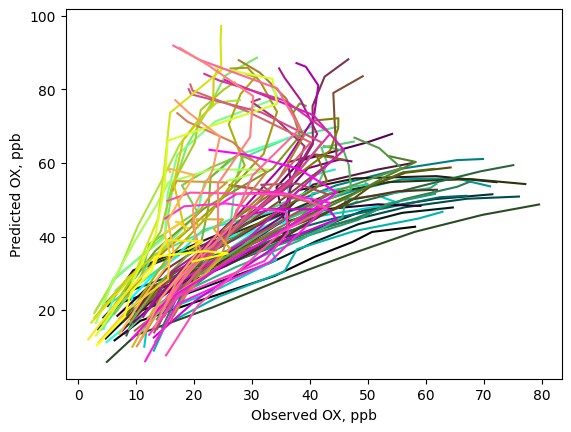

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from delaunayextrapolation import DelaunayE

Y = np.zeros_like(obs)
for hr in range(1,9):
    Y[:,hr-1]= data[f"+{hr}"]

xL = len(spec["X"])
yL = len(spec["Y"])
xy = np.array([[-0.001,-0.001], [xL-0.99,0], [0,yL-0.991],[xL-1,yL-0.992]])
# xy = np.array([[0, -0.1], [0, 1.1], [1.2, 0], [1, 1]])
tri = DelaunayE(xy)
colors = np.array([[0,0,0], [0,1,1], [1,0,1], [1,1,0]]) # K, C, M, Y
#
# K---C
# |   |
# M---Y
#

row = 0
for iy, y in enumerate(spec["Y"]):
    for ix, x in enumerate(spec["X"]):
        vertices, ratios = tri.mixratio(np.array([ix,iy]))
        c = colors[vertices[0]]*ratios[0]+colors[vertices[1]]*ratios[1]+colors[vertices[2]]*ratios[2]
        plt.plot(obs[row],Y[row], "-", color=c)
        row += 1
    
plt.xlabel("Observed OX, ppb")
plt.ylabel("Predicted OX, ppb")


In [50]:
# from folium import Map, LayerControl  # , Choropleth, FeatureGroup
import folium

# 測定値
image = np.zeros([yL, xL, 3])
for iy, y in enumerate(spec["Y"]):
    for ix, x in enumerate(spec["X"]):
        vertices, ratios = tri.mixratio(np.array([ix,iy]))
        c = colors[vertices[0]]*ratios[0]+colors[vertices[1]]*ratios[1]+colors[vertices[2]]*ratios[2]
        image[iy,ix] = c

layer = folium.raster_layers.ImageOverlay(
        image=image,
        bounds=[
            [np.min(spec["lat"]), np.min(spec["lon"])],  # lat,lon
            [np.max(spec["lat"]), np.max(spec["lon"])],  # lat,lon
        ],
        opacity=0.8,
        # name=name,
    )

# 地図の中心位置
center = np.mean(spec["lat"]), np.mean(spec["lon"])

# 地図を作る
m = Map(center, zoom_start=10)

# レイヤをオーバーレイする
layer.add_to(m)

# 切り替えボタン(もっと見易くしたい)
LayerControl().add_to(m)

# GroupedLayerControl({"NOX": layers[0]}, ["NOX"]).add_to(m)

# 表示
m